# IMPORT

In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import matplotlib as mpl
import os
from sklearn.svm import SVR
from sklearn import metrics
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split ,GridSearchCV , RandomizedSearchCV

In [24]:
#matplotlib.rcParams('font.family') = 'tahoma'

In [25]:
url = "https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-by-provinces"
r = requests.get(url)
j = r.json()
cov = pd.DataFrame(j)

In [26]:
dfs = cov.pivot_table(columns="txn_date",index="province", values = "new_case_excludeabroad")

In [27]:
dfa = dfs.iloc[: , -31:]

# Line plot

In [28]:
url2 = "https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-all"
d = requests.get(url2)
js = d.json()

ds_raw = pd.DataFrame(js)
ds2 = ds_raw[["txn_date","new_case"]]

In [29]:
ds2 = ds2

In [30]:
ds2 = ds2.reset_index(drop=True)
ds2.shape

(333, 2)

In [31]:
xdf = np.arange(len(ds2))

In [32]:
ydf = ds2["new_case"]
xdf = xdf.reshape(-1,1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split( xdf, ydf, test_size=0.33, random_state=42)

In [ ]:
SVR_model = SVR(gamma=0.1 , epsilon=10 ,C=100 ,kernel="poly").fit(X_train,y_train)

In [20]:
y_pre = SVR_model.predict(X_test)

NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

NameError: name 'y_pre' is not defined

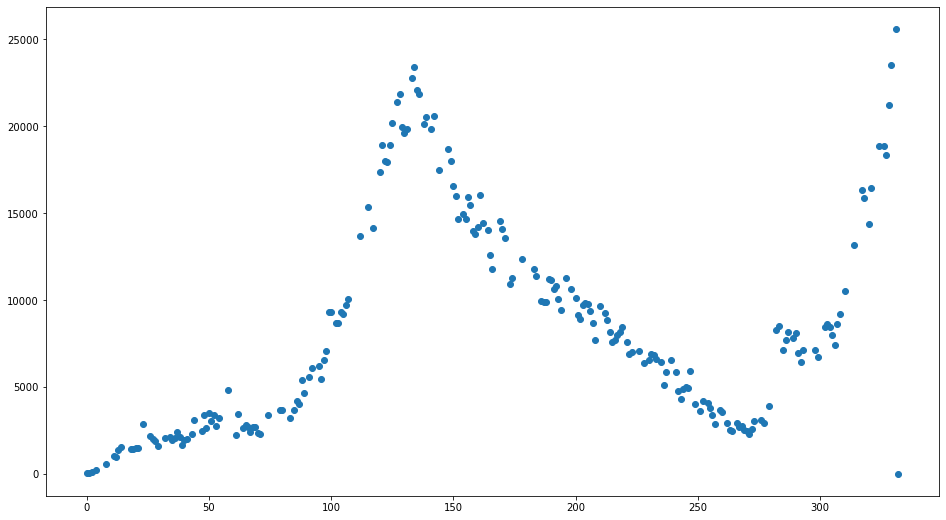

In [19]:
plt.figure(figsize=(16,9))
plt.scatter(x=X_train ,y=y_train )
plt.scatter(x=X_test ,y=y_pre )

In [17]:
sd =list(np.linspace(0.1, 1, 3, dtype = float))

params = {
    'C':list(np.linspace(0.1, 150, 3, dtype = float)),
    "epsilon":list(np.linspace(0.1, 1, 3, dtype = float)),
    "gamma" : list(np.linspace(0.01, 0.1, 3, dtype = float)),
    "degree" : [2, 3],
    'kernel':["rbf","poly"]}

In [18]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
clf = GridSearchCV(estimator=SVR_model ,
                   n_jobs=6   ,
                    verbose=10,
                   cv=2 ,
                   scoring="neg_mean_squared_error",
                  param_grid =params
                  )

In [ ]:
result = clf.fit(X_train ,y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
